In [1]:
import tensorflow as tf 
import keras
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


## Vanilla K-Means

In [2]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# Convert data to lie in range 0 and 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Reshaping data 
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]**2))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]**2))
# Defining number of clusters
n_clusters = len(np.unique(y_train))

In [4]:
# KMeans
modelK = KMeans(n_clusters=n_clusters)

In [5]:
# Fit model
modelK.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
# Prediction for training set
y_pred = modelK.predict(X_train)

In [7]:
# The clusters generated by KMeans are completely random and their
# results do not match with the actual target labels of the dataset
# and so the accuracy is calculated differently
metrics.normalized_mutual_info_score(y_train, y_pred)

/Users/ajitbhat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5120272209162084

In [8]:
# Confusion Matrix
metrics.confusion_matrix(y_train, y_pred)

array([[ 173,  434,  174, 3412,    0,   39, 1719,   18,    2,   29],
       [  28,  127, 5407,  236,    0,   44,  156,    2,    0,    0],
       [1891,  424,    8,   84,    0, 1856, 1690,   22,    1,   24],
       [  17,  408, 3139, 1706,    1,   54,  664,    3,    0,    8],
       [ 945,  194,  148,  711,    0, 3025,  938,   13,    0,   26],
       [   0, 4006,    1,    3,  485,    0,   52,   10, 1431,   12],
       [ 952,  629,   49, 1036,    2, 1190, 2074,   43,    6,   19],
       [   0,  650,    0,    0,  287,    0,    1,    6, 5056,    0],
       [ 286,  423,   20,   21,    8,   36,  327, 2155,  289, 2435],
       [   1,  199,    3,    8, 5025,   10,   62,    5,  684,    3]])

In [9]:
# Prediction for test set
y_pred_test = modelK.predict(X_test)

In [35]:
metrics.normalized_mutual_info_score(y_test, y_pred_test)

/Users/ajitbhat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.514145389900235

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred_test)

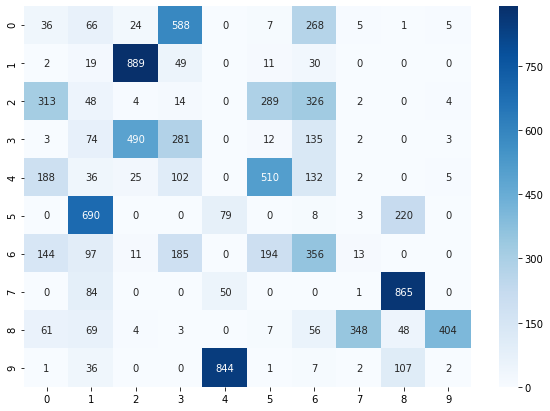

In [12]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(10,7))
sns.heatmap(pd.DataFrame(cm, range(10), range(10)), annot=True, cmap='Blues', fmt='g')

 ## AutoEncoder

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

In [14]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [15]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [16]:
# Add Gaussian noise to the training data for better generalization and to prevent overfitting
noise = np.random.normal(size=X_train.shape)
noise_factor = 0.5 # percentage of noise to be added
X_train_noisy = X_train + noise_factor*noise

### -- Deep AutoEncoder

In [17]:
X_train_noisy_deep = X_train_noisy.reshape((X_train.shape[0], X_train.shape[1]**2))
X_test_deep = X_test.reshape((X_test.shape[0], X_test.shape[1]**2))
X_train_deep = X_train.reshape((X_train.shape[0], X_train.shape[1]**2))

In [18]:
# Define encoder and decoder layers of the AutoEncoder
# The last layer of encoder has a column shape of 98 
# which means the original images are compressed to the ratio 8:1
input_layer = Input(shape=(784,))
encoded = Dense(392, activation='relu')(input_layer)
encoded = Dense(196, activation='relu')(encoded)
encoded = Dense(98, activation='relu')(encoded)

decoded = Dense(196, activation='relu')(encoded)
decoded = Dense(392, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# AutoEncoder model fully connected
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# Encoder layer of the AutoEncoder
encoder = Model(input_layer, encoded)

In [19]:
# Fit data to encoder and decoder layers so that the encoder layer learns how accuractely to compress data
# so as to preserve all the important information required to accurately rebuild the data items
historyDeep = autoencoder.fit(X_train_noisy_deep, X_train_deep,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_deep, X_test_deep))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.4717 - val_loss: 0.4427
Epoch 2/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.3759 - val_loss: 0.3989
Epoch 3/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.3626 - val_loss: 0.4075
Epoch 4/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.3496 - val_loss: 0.3676
Epoch 5/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.3402 - val_loss: 0.3947
Epoch 6/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.3332 - val_loss: 0.3561
Epoch 7/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.3286 - val_loss: 0.3527
Epoch 8/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.3252 - val_loss: 0.3782
Epoch 9/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.3231 - val_loss: 0.3

60000/60000 [==============================] - 4s 71us/step - loss: 0.2937 - val_loss: 0.3157
Epoch 78/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2935 - val_loss: 0.3150
Epoch 79/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.2933 - val_loss: 0.3133
Epoch 80/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2932 - val_loss: 0.3132
Epoch 81/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2931 - val_loss: 0.3101
Epoch 82/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2930 - val_loss: 0.3198
Epoch 83/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2928 - val_loss: 0.3080
Epoch 84/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2927 - val_loss: 0.3147
Epoch 85/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2927 - val_loss: 0.3130
Epoch 86/100
60000/60000 [========================

In [20]:
decoded_img = autoencoder.predict(X_train_deep)
# compressed image
encoded_img = encoder.predict(X_train_deep)

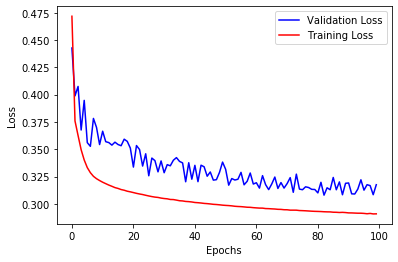

In [21]:
# plot validation loss vs epoch, training loss vs epoch
val_loss = historyDeep.history["val_loss"]
train_loss = historyDeep.history["loss"]
plt.plot(range(len(val_loss)), val_loss, color = 'blue')
plt.plot(range(len(train_loss)), train_loss, color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(("Validation Loss", "Training Loss"))
plt.show()

### -- K-Means with Deep AutoEncoder

In [22]:
modelKDeep = KMeans(n_clusters=n_clusters)
modelKDeep.fit(encoded_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
y_pred_test_deep = modelKDeep.predict(encoder.predict(X_test_deep))

In [24]:
metrics.normalized_mutual_info_score(y_test, y_pred_test_deep)

/Users/ajitbhat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.543990417162316

In [25]:
cmDeep = metrics.confusion_matrix(y_test, y_pred_test_deep)

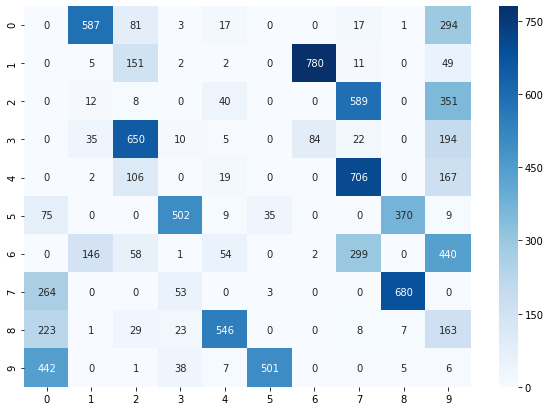

In [26]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(10,7))
sns.heatmap(pd.DataFrame(cmDeep, range(10), range(10)), annot=True, cmap='Blues', fmt='g')

## GMM with AutoEncoder output

In [27]:
from sklearn.mixture import GaussianMixture

In [28]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [29]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]**2))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]**2))

In [30]:
# Use Gaussian Mixture for clustering on the encoded image of the autoencoder
gmm = GaussianMixture(n_components=10)
gmm.fit(encoded_img)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [31]:
y_pred_GMM = gmm.predict(encoder.predict(X_test_deep))

In [32]:
metrics.normalized_mutual_info_score(y_test, y_pred_GMM)

/Users/ajitbhat/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5075422323859019

In [33]:
cmGMM = metrics.confusion_matrix(y_test, y_pred_GMM)

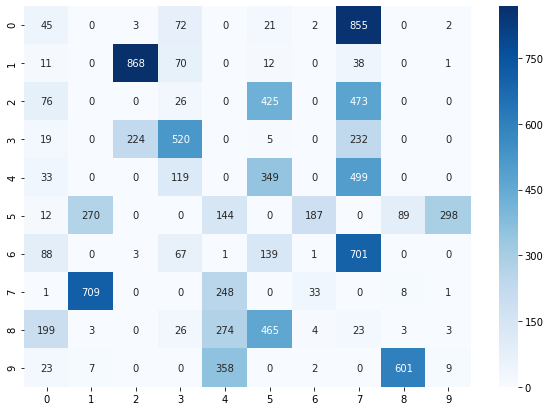

In [34]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(10,7))
sns.heatmap(pd.DataFrame(cmGMM, range(10), range(10)), annot=True, cmap='Blues', fmt='g')

## NOTE: I have used the average accuracy over multiple trials in the report.  